# QCTO - Workplace Module

### Project Title: vegetable prices
#### Done By: josephina  Ndukwani
https://trello.com/b/QdZgzM3U/predict-project-on-vegetables-prices  link to trello board
https://github.com/Josephinandukwani/predict-project.git link to git hub

© ExploreAI 2024


## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>


## **Introduction**


In this project, i aim to explore the pricing data of various vegetables in order to gain insights into their market trends and behavior. To begin, i import the necessary libraries and data, and then clean and inspect the data to ensure its quality and suitability for analysis. i create a copy of the dataframe as a checkpoint, and then change the data types to be more suitable for our analysis objectives. Next, i conduct exploratory data analysis (EDA) to gain a deeper understanding of the data.

## Problem Statement

The problem statement is to analyze the pricing data of various vegetables and identify the key patterns and trends. The dataset contains information about the prices of different vegetable types, including Bhindi (Ladies finger), Tomato, Onion, Potato, Brinjal, Garlic, Peas, Methi, Green Chilli, and Elephant Yam (Suran). The analysis aims to answer questions such as:

* What is the distribution of prices for each vegetable type?
* Are there any outliers in the data?
* Which vegetable types have a higher average price?
* Are there any patterns or trends in the data that can be used to make informed decisions?


## **Importing Packages**


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression




## **Data Collection and Description**


The purpose of data collection for this project is to analyze vegetable price trends across different regions in India. The collected data provides insights into fluctuations in vegetable prices, allowing for a better understanding of regional price variations and potential factors affecting pricing.The data was sourced from Agmarknet, an open government database that tracks agricultural commodity prices across India. The dataset includes pricing information for various vegetables from multiple markets.it consist of 287 rows and 11 columns,"The dataset contains both numerical and categorical data, 



## **Loading Data**

the purpose of this section is to load the raw data into the notebook for further manipulation and analysis.
In this code, i use pandas to load the dataset from a file named prices.csv into a DataFrame named pddf. This allows me to easily manipulate and analyze the data. Once loaded, the dataset can be inspected, cleaned, and processed as needed.

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
pddf = pd.read_csv("prices.csv")

first few rows of the data frame

In [22]:
pddf.info

<bound method DataFrame.info of     Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    01-01-2023                    35.0      18   22.0      20       30   
1    02-01-2023                    35.0      16   22.0      20       30   
2    03-01-2023                    35.0      16   21.0      20       30   
3    04-01-2023                    30.0      16   21.0      22       25   
4    08-01-2023                    35.0      16   20.0      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  27-12-2023                    45.0      16   30.0      20       70   
283  28-12-2023                    45.0      16   30.0      20       70   
284  29-12-2023                    45.0      16   30.0      22       80   
285  31-12-2023                    45.0      16   26.0      20       60   
286  01-01-2024                    45.0      16    9.0      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0   

In [23]:
print(pddf.describe())

       Bhindi (Ladies finger)      Tomato       Onion      Potato     Brinjal  \
count              287.000000  287.000000  287.000000  287.000000  287.000000   
mean                29.444251   16.006969   20.649826   18.585366   31.655052   
std                  8.124815    0.118056   11.711204    2.726238   11.725421   
min                 17.000000   16.000000    8.000000   12.000000   14.000000   
25%                 22.000000   16.000000   12.000000   16.000000   25.000000   
50%                 27.500000   16.000000   16.000000   20.000000   30.000000   
75%                 33.000000   16.000000   25.000000   20.000000   35.000000   
max                 60.000000   18.000000   57.000000   24.000000   80.000000   

           Garlic        Peas        Methi  Green Chilli  Elephant Yam (Suran)  
count  287.000000  287.000000   287.000000    287.000000            287.000000  
mean   133.101045   66.658537    20.383275     44.122404             28.797909  
std     60.078331   33.3024

In [24]:

print(pddf.head())

  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25  


In [25]:
print(pddf.dtypes)

Price Dates                object
Bhindi (Ladies finger)    float64
Tomato                      int64
Onion                     float64
Potato                      int64
Brinjal                     int64
Garlic                      int64
Peas                        int64
Methi                       int64
Green Chilli              float64
Elephant Yam (Suran)        int64
dtype: object



## **Data Cleaning and Filtering**
The purpose of this section is to prepare the dataset for analysis by performing essential data cleaning tasks such as handling missing values, removing outliers, correcting errors, and filtering the data to focus on relevant features.

Handling missing values

In [26]:

# Now check for missing values
print(pddf.isnull().sum())

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64


In [27]:

# Convert 'Price Dates' to datetime
pddf['Price Dates'] = pd.to_datetime(pddf['Price Dates'], format='%d-%m-%Y')

# Example: Correct a specific error (e.g., negative prices should be NaN)
# Assuming 'Tomato' prices shouldn't be negative
pddf.loc[pddf['Tomato'] < 0, 'Tomato'] = None

# Print DataFrame after correcting errors
print("DataFrame after correcting errors:")
print(pddf.head())

DataFrame after correcting errors:
  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  2023-01-01                    35.0    18.0   22.0      20       30      50   
1  2023-01-02                    35.0    16.0   22.0      20       30      55   
2  2023-01-03                    35.0    16.0   21.0      20       30      55   
3  2023-01-04                    30.0    16.0   21.0      22       25      55   
4  2023-01-08                    35.0    16.0   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25  



## **Exploratory Data Analysis (EDA)**

The goal of the EDA phase is to uncover insights about the dataset, identify patterns, trends, and relationships, and assess data quality before diving into deeper analysis.


 Histograms for All Numerical Columns

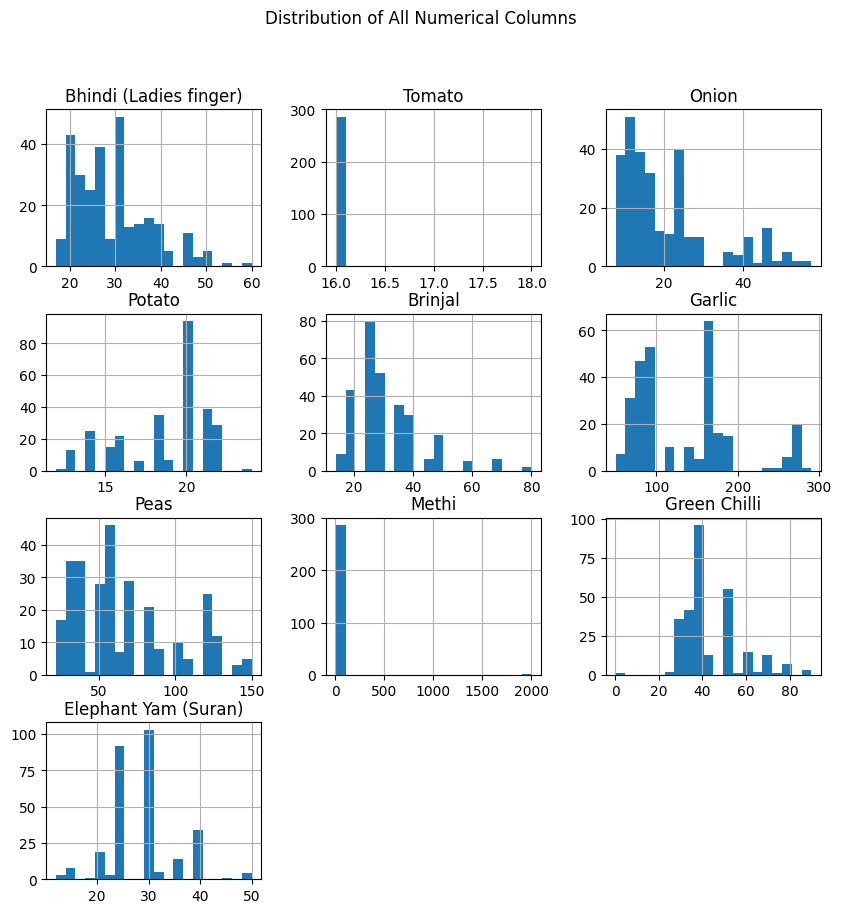

In [29]:
# List of numerical columns
numerical_columns = pddf.select_dtypes(include=['number']).columns

if not numerical_columns.empty:
    pddf[numerical_columns].hist(bins=20, figsize=(10, 10))
    plt.suptitle('Distribution of All Numerical Columns')
    plt.show()
else:
    print("No numerical columns found in the DataFrame.")

Variability: Some vegetables like Garlic, Peas, and Green Chilli show considerable price variability, which might be influenced by seasonal changes, supply-demand imbalances, or other factors.
Consistency: Tomato and Brinjal exhibit very stable prices with minimal variation, possibly due to stable supply chains or low market volatility.
Multimodality: Vegetables such as Bhindi, Potato, and Green Chilli demonstrate multiple price peaks, which could reflect different periods of price increases or the influence of external factors like regional pricing differences.

 box plot comparing different vegetables

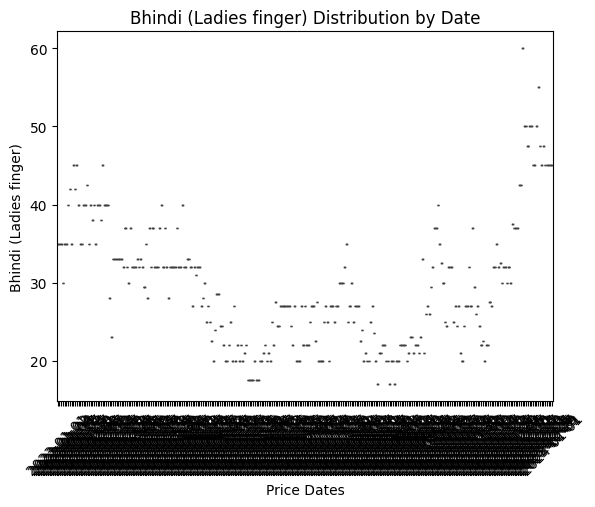

In [30]:
# Box plot comparing 'Bhindi (Ladies finger)' across different dates
sns.boxplot(x='Price Dates', y='Bhindi (Ladies finger)', data=pddf)
plt.title('Bhindi (Ladies finger) Distribution by Date')
plt.xticks(rotation=45)
plt.show()

The plot suggests that Bhindi prices have decreased over time, moving from higher ranges (30-40) to lower ranges (20-30). Occasional spikes above 50 are visible, though they are infrequent. The overall trend shows volatility but with a clear downward movement.

 Scatter Plots

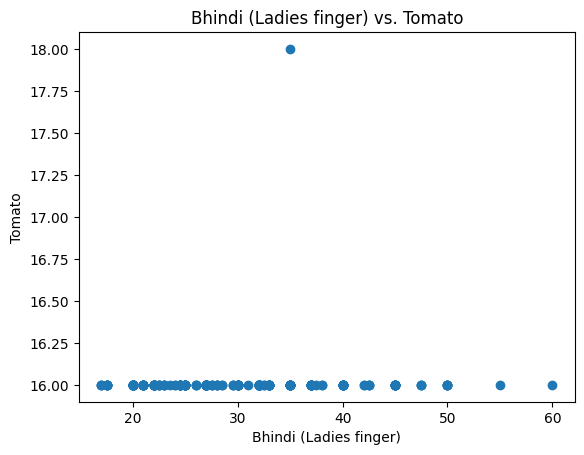

In [31]:
plt.scatter(pddf['Bhindi (Ladies finger)'], pddf['Tomato'])
plt.title('Bhindi (Ladies finger) vs. Tomato')
plt.xlabel('Bhindi (Ladies finger)')
plt.ylabel('Tomato')
plt.show()

There is no significant correlation between Bhindi and Tomato prices based on this plot. Tomato prices remain stable around 16, irrespective of Bhindi price fluctuations. The lone outlier above 18 could indicate an exceptional market event for tomatoes, but overall, these two vegetables seem to have independent pricing patterns.

Correlation Matrix

                        Price Dates  Bhindi (Ladies finger)    Tomato  \
Price Dates                1.000000               -0.019647 -0.106137   
Bhindi (Ladies finger)    -0.019647                1.000000  0.040505   
Tomato                    -0.106137                0.040505  1.000000   
Onion                      0.771938                0.135353  0.006829   
Potato                     0.497531               -0.142327  0.030737   
Brinjal                    0.288494                0.534585 -0.008361   
Garlic                     0.930223                0.211865 -0.081934   
Peas                       0.432846               -0.391240 -0.074097   
Methi                      0.028402               -0.022921 -0.006247   
Green Chilli              -0.034019               -0.209258  0.004062   
Elephant Yam (Suran)       0.287330                0.010470 -0.034045   

                           Onion    Potato   Brinjal    Garlic      Peas  \
Price Dates             0.771938  0.497531  0.2

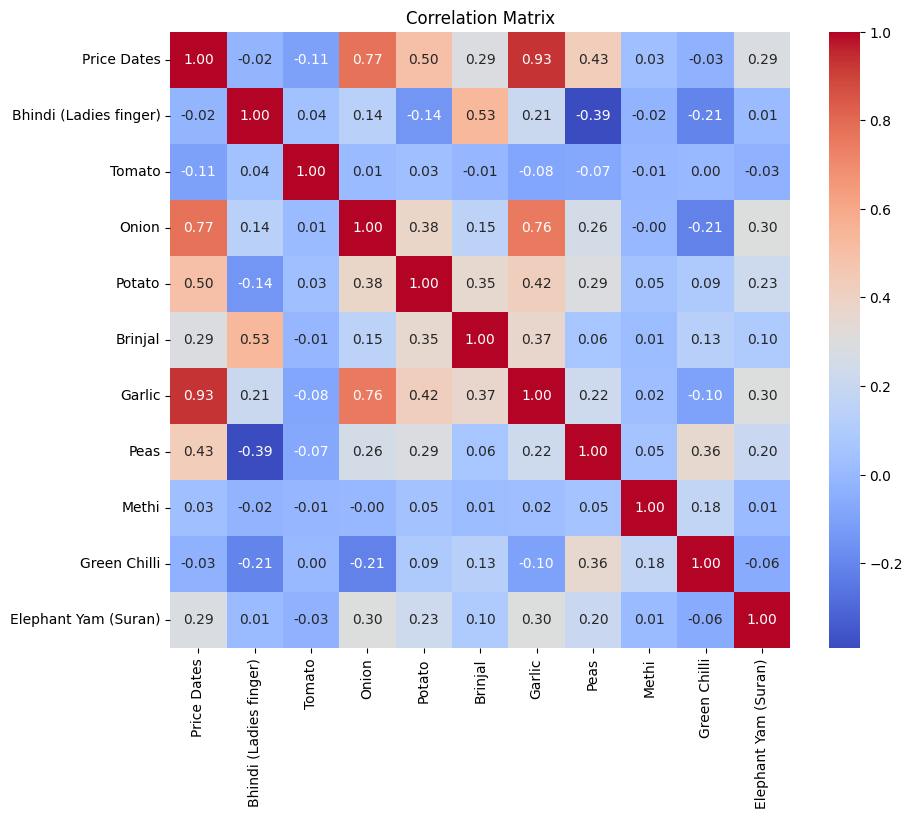

In [32]:
# Compute correlation matrix
correlation_matrix = pddf.corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Garlic and Onion prices are heavily influenced by time, showing a strong upward trend.
Bhindi has a positive relationship with Brinjal but a negative one with Peas, indicating some market dependencies between these.
Tomato remains largely independent of other vegetables' price movements, as seen earlier.
The dataset shows that while some vegetables share pricing trends, others, like Tomato and Green Chilli, are relatively unaffected by changes in other prices.

INSIGHTS

The analysis of vegetable prices reveals significant trends and relationships among the different vegetables over time. Garlic and Onion show strong upward trends, with correlations of 0.93 and 0.77 with price dates, respectively, indicating consistent price increases. In contrast, Bhindi prices have generally decreased from higher ranges (30-40) to lower ranges (20-30), while showing a moderate positive correlation (0.53) with Brinjal and a negative correlation (-0.39) with Peas, suggesting interdependencies in their pricing. Tomato prices remain stable around 16.0, exhibiting minimal variation and almost no correlation with other vegetables, indicating an independent pricing pattern. Overall, the analysis highlights significant price variability in vegetables like Garlic, Peas, and Green Chilli, potentially influenced by seasonal changes, while others, like Tomato and Brinjal, demonstrate stability. Understanding these dynamics can provide valuable insights for producers and consumers in managing pricing strategies and anticipating market movements. Further exploration of seasonal effects and external factors affecting prices could enhance these insights.








---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [34]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [35]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [36]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [37]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [38]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
